# Demo


__This code is some of the original code with additional cleaning, abstraction, and pipelines. Some of the features have been modified and the output results are therefore different from those shown in the thesis. The original code is not included in this repository.__

The model in this notebook trains with all data minus the final quarter. The original thesis used the 9th quarter for CV and feature selection method comparison; while the 10th quarter was used for model comparison and observing results. The output files show scores for the entire test set and also using CV (kfold stratified).

The results in this file differ from the theis somewhat. I implemented a lot of new code/pipelines to help generalize/abstract. I would need to invest time in trying to find where the differences are occuring. At first blush, the pol_num_freq feature importance score seems inflated. I would probably start there. There is also the possibility that the high correlation between the lags and prem are causing a negative effect on model performance - in which case, differencing/transformation methods can be tried. This is something I looked at extensively during thesis. Highly correlated feature groups and their impact on ensemble tree-based methods can be studied further with the following papers:

[69] Carolin Strobl, Anne-Laure Boulesteix, Thomas Kneib, and Thomas Augustin. Conditional variable importance for random forests, BMC Bioinformatics. 9 (2008), 307, DOI: 10.1186/1471-2105-9-307.

[72] Laura Tolosi and Thomas Lengauer. Classification with Correlated Features: unreliability of feature ranking and solutions, Department of Computational Biology and Applied Algorithmics. 27 (2008), no. 14, 1986-1994, DOI: 10.1093/bioinformatics/btr300.


In [2]:
# LOCAL FILES
from churn_imports import *
from churn_code import *
from lagGen import *
from featureMaps import *
%matplotlib inline
tqdm.pandas()

# OTHER FILES
path = ('../code/')
code_files = ['quickpipeline', 'cleaners', 'features', 'random_code',
              'pd_feature_union']
for file in code_files:
    sys.path.append(path + file)

# THIS VERSION OF QUICKPIPELINE IS SLIGHTLY MODIFIED TO WORK WITH SKLEARN 
# PIPELINES
from quickpipe_mod import QuickPipeline_mod
from plots import *
from pandas_feature_union import *


In [66]:
# DATA ANONYMIZED USING FAKER 
data_anonymized = pd.read_csv('../data/policy_data_anonymized.csv')
print(data_anonymized.shape)


(196428, 37)


In [ ]:
# data_anonymized.head()


In [29]:
df = data_anonymized.copy()


In [ ]:
# df.isnull().sum()


In [5]:
# SEE CODE FILES FOR DESCRIPTION
lag_pipe = make_pipeline(LagGenerator(), 
                     LagGenerator(value='churn', entity='agnt', aggfunc='count', 
                                  colname='non_ren', annual=False, policy='Non-Renew'),
                     LagGenerator(value='churn', entity='agnt', aggfunc='count',
                                  colname='np', annual=False, policy='New'))


In [6]:
# SEE CLASSES FOR DESCRIPTIONS
TimeFeatures(df).time_feats()
df = lag_pipe.fit_transform(df)
MetricVec(df).modify()
FeatureMaps(df).run_all()


In [7]:
# THE FIRST TWO QUARTERS WILL NEED TO BE DROPPED
df.tail()


,pol_num,account,line,line_tenure,prgm,industry,segment,con_type,risk_state,county,hub,UI_code,processing,seg_strategy,sales_ex,sales_dir,acc_mngr,uw_ex,uw_dir,agnt,price_complex,risk_complex,special_pgrm,coastal,multi_pol,hail_cov,sale_ex_internal,rate_chng,prem,churn,month_nom,month_prog,year,lag_1_prem,lag_2_prem,lag_1_non_ren,lag_2_non_ren,lag_1_np,lag_2_np,metRic,diff_ris_agnt_state,diff_agn_mstr_agnt,csf_ind,csf_market_sh,csf_div,tech_score,ed_score,processing_num,zip_cat,terr_cat,quarter_cat,abs_q_cat
eff_dt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-01,eb76d2080994ff3e4a528da521a1e73d,"Ferguson, Pena and Jackson",A,20.0,"FLORISTS, INCLUDING ARTIFICIAL",Retail,Store,other,CO,GARFIELD,Port Diane,8.0,least_personal,Superior,Amber Gray,Bianca Stephens,Hunter Thompson,Jillian Fernandez,Mr. Kevin Ramirez,Richards PLC,False,True,True,False,True,False,False,16.02,803.52,Renew,Jun,6.0,2018_,600116.85,612732.39,5.0,6.0,2.0,1.0,1.0,False,True,True,3.0,2.0,80.40,36.4,1.0,cat_98606,cat_3,cat_2,cat_10
2018-06-01,28849d744e1cb60c4dfb623a82a4e0d8,Velazquez-Morris,L,12.0,COMMERCIAL BUILDING ALL OTHER,Commercial Real Estate,Building,other,WA,PIERCE,Lake Christianland,1.0,personal,Property,Erik Fischer,Devin Anderson,Hunter Thompson,Michael Rivera,Alicia Daniels,Barber Ltd,False,True,False,False,True,False,False,7.50,250.14,Renew,Jun,6.0,2018_,1163135.78,1166581.07,18.0,15.0,8.0,3.0,NaN,False,False,True,0.0,0.0,71.84,31.1,2.0,cat_48933,cat_6,cat_2,cat_10
2018-06-01,28849d744e1cb60c4dfb623a82a4e0d8,Velazquez-Morris,P,12.0,COMMERCIAL BUILDING ALL OTHER,Commercial Real Estate,Building,other,WA,PIERCE,Lake Christianland,1.0,personal,Property,Erik Fischer,Devin Anderson,Hunter Thompson,Michael Rivera,Alicia Daniels,Barber Ltd,False,True,False,False,True,False,False,47.30,951.36,Renew,Jun,6.0,2018_,1163135.78,1166581.07,18.0,15.0,8.0,3.0,NaN,False,False,True,0.0,0.0,71.84,31.1,2.0,cat_48933,cat_6,cat_2,cat_10
2018-06-01,cfd568d3a6b15a42f6457a1934033237,Anderson Ltd,C,3.0,OFC omit1 DENTISTS,Healthcare,Office,Frame,ID,PAYETTE,Lake Christianland,5.0,least_personal,Superior,Alex King,Devin Anderson,Hunter Thompson,Michael Rivera,Alicia Daniels,Mckee Ltd,False,True,False,False,False,False,False,52.08,2640.07,Renew,Jun,6.0,2018_,689439.26,670613.66,6.0,2.0,18.0,10.0,1.0,True,True,True,3.0,1.0,46.30,24.4,1.0,cat_35599,cat_2,cat_2,cat_10
2018-06-01,7629221af44448a6bf6abbac9f40c249,Campbell Group,WC,1.0,OFC omit2 PHYS AND SURG & OSTE,Healthcare,Office,other,TX,CARSON CITY,Michaelstad,2.0,most_personal,Superior,Jodi Hunter,Bianca Stephens,Tami May,Clifford Frank,Jose Hernandez,Carlson-Fry,True,True,True,False,False,False,False,0.00,4232.13,New,Jun,6.0,2018_,1303677.42,1317736.73,16.0,8.0,8.0,10.0,NaN,True,False,True,2.0,3.0,58.66,25.9,3.0,cat_3549,cat_5,cat_2,cat_10


In [8]:
# DROP FIRST 2 QUARTERS
df_ = df[-df.abs_q_cat.isin(['1_cat','2_cat'])]


In [9]:
y = df_[['churn']]
df_.drop(['churn'], axis=1, inplace=True)


In [ ]:
# df_.isnull().sum()


In [10]:
cats = ['price_complex', 'risk_complex', 'special_pgrm', 'coastal', 'multi_pol',
       'hail_cov', 'sale_ex_internal', 'diff_ris_agnt_state',
       'diff_agn_mstr_agnt', 'csf_ind']


transformer_list = [ ('numeric', make_pipeline(TypeSelector(np.number),
                                 StandardScalerDf(),
                                 SoftImputeDf(),
                                QuickPipeline_mod()
                                )
                     ), ('frequency_features', make_pipeline(
                         TypeSelector(np.object),
                         RegImpute(),
                         FreqFeatures(),
                        QuickPipeline_mod()
                         ) 
                       ), ('binned_features', make_pipeline(
                        TypeSelector(np.number),
                        StandardScalerDf(),
                        SoftImputeDf(),
                        SelectFeatures(val_count=100),
                        KBins(n_bins=4),
                        QuickPipeline_mod()
                         )
                ), ('boolean_features', make_pipeline(
                         TypeSelector(np.bool_),
                         RegImpute(regex=False),
                        QuickPipeline_mod(categorical_features=cats)
                        )
                   ) 
                                           
                   ]


In [11]:
preprocess_pipeline = make_pipeline(PandasFeatureUnion(transformer_list))

X = preprocess_pipeline.fit_transform(df_)


In [13]:
X.head()


,line_tenure,UI_code,rate_chng,prem,month_prog,lag_1_prem,lag_2_prem,lag_1_non_ren,lag_2_non_ren,lag_1_np,lag_2_np,metRic,csf_market_sh,csf_div,tech_score,ed_score,processing_num,pol_num_freq,account_freq,prgm_freq,county_freq,agnt_freq,zip_cat_freq,line_A,line_C,line_L,line_P,line_U,line_WC,industry_CommercialRealEstate,industry_Contractors,industry_FinancialServices,industry_Garage,industry_Healthcare,industry_Hotel,industry_Manufacturing,industry_PersonalCareServices,industry_PetCareServices,industry_PrintersandPublishers,industry_ProfessionalServices,industry_ReligiousandCultural,industry_ResidentialProperty,industry_RestaurantsandFoodService,industry_Retail,industry_ServiceBusiness,industry_TechServices,industry_Wholesalers,segment_AllOther,segment_Apartments,segment_Building,segment_Business,segment_Condominiums,segment_Contractors,segment_Garage,segment_Institutional,segment_Manufacturers,segment_Office,segment_Restaurants,segment_Store,segment_TechOffice,segment_TechnologyManufacturers,segment_Wholesalers,con_type_FireResistive,con_type_Frame,con_type_JoistedMasonry,con_type_MasonryNC,con_type_ModifiedFR,con_type_NonCombustible,con_type_other,risk_state_AK,risk_state_AL,risk_state_AR,risk_state_AZ,risk_state_CA,risk_state_CO,risk_state_CT,risk_state_DC,risk_state_DE,risk_state_FL,risk_state_GA,risk_state_HI,risk_state_IA,risk_state_ID,risk_state_IL,risk_state_IN,risk_state_KS,risk_state_KY,risk_state_LA,risk_state_MA,risk_state_MD,risk_state_ME,risk_state_MI,risk_state_MN,risk_state_MO,risk_state_MS,risk_state_MT,risk_state_NC,risk_state_ND,risk_state_NE,risk_state_NH,risk_state_NJ,risk_state_NM,risk_state_NV,risk_state_NY,risk_state_OH,risk_state_OK,risk_state_OR,risk_state_PA,risk_state_RI,risk_state_SC,risk_state_SD,risk_state_TN,risk_state_TX,risk_state_UT,risk_state_VA,risk_state_VT,risk_state_WA,risk_state_WI,risk_state_WV,risk_state_WY,hub_LakeChristianland,hub_Michaelstad,hub_PortDiane,processing_least_personal,processing_most_personal,processing_personal,seg_strategy_Balanced,seg_strategy_NotAMarket,seg_strategy_Property,seg_strategy_Selective,seg_strategy_Superior,sales_ex_AlexKing,sales_ex_AmberGray,sales_ex_AmyBell,sales_ex_BrandyBryant,sales_ex_BrittanyHuerta,sales_ex_DeborahWare,sales_ex_ErikFischer,sales_ex_JasmineDuke,sales_ex_JodiHunter,sales_ex_KathleenPalmer,sales_ex_LindseyHernandez,sales_ex_MarthaTorres,sales_ex_MichaelCox,sales_ex_RichardMoore,sales_ex_SabrinaJacobs,sales_ex_SaraMiller,sales_ex_ScottGarcia,sales_ex_ShelbyHernandez,sales_ex_WilliamStephenson,sales_dir_BiancaStephens,sales_dir_DanielleDuncan,sales_dir_DevinAnderson,sales_dir_KathleenPalmer,acc_mngr_AllisonRitter,acc_mngr_AngelSmithDVM,acc_mngr_BeverlyRoyPhD,acc_mngr_CynthiaRodriguez,acc_mngr_HunterThompson,acc_mngr_JacobLindsey,acc_mngr_JosephCardenas,acc_mngr_KarenHenry,acc_mngr_KathleenPalmer,acc_mngr_LoriCruz,acc_mngr_MichaelCooper,acc_mngr_MitchellCollins,acc_mngr_TamiMay,uw_ex_AdamLucas,uw_ex_BrendaChapman,uw_ex_CatherineHoffman,uw_ex_CliffordFrank,uw_ex_CrystalBurns,uw_ex_DanaReed,uw_ex_DrJuliaJohnsonMD,uw_ex_JamesHenderson,uw_ex_JanetGreen,uw_ex_JasonRobinson,uw_ex_JasonWhitehead,uw_ex_JillianFernandez,uw_ex_JosePatton,uw_ex_JuanCastillo,uw_ex_KarenBlack,uw_ex_KathleenPalmer,uw_ex_LisaMitchell,uw_ex_MeaganRoman,uw_ex_MichaelRivera,uw_ex_MichelleTrevino,uw_ex_RobynRoberson,uw_ex_RubenWaller,uw_ex_StephanieBrown,uw_ex_TammyWalsh,uw_ex_TimothySingh,uw_ex_YolandaScott,uw_dir_AliciaDaniels,uw_dir_JasonWhitehead,uw_dir_JoseHernandez,uw_dir_KathleenPalmer,uw_dir_MrKevinRamirez,month_nom_Apr,month_nom_Aug,month_nom_Dec,month_nom_Feb,month_nom_Jan,month_nom_Jul,month_nom_Jun,month_nom_Mar,month_nom_May,month_nom_Nov,month_nom_Oct,month_nom_Sep,year_2016_,year_2017_,year_2018_,terr_cat_cat_0,terr_cat_cat_1,terr_cat_cat_10,terr_cat_cat_11,terr_cat_cat_12,terr_cat_cat_13,terr_cat_cat_14,terr_cat_cat_15,terr_cat_cat_16,terr_cat_cat_17,terr_cat_cat_18,terr_cat_cat_19,terr_cat_cat_2,terr_cat_cat_20,terr_cat_cat_21,terr_cat_cat_22,terr_cat_c

In [47]:
# NEW POLICIES ARE DROPPED OFF AND THE TIMESTAMP INDEX IS RESET
df = X.copy()
df = df[df.churn != 'New']
df.churn = df.churn.map({'Renew': 0, 'Non-Renew': 1})
df.reset_index(drop=True, inplace=True)
df.shape

(165779, 1295)

In [48]:
# CATEGORICALS ARE ALREADY ONE-HOT ENCODED
# X_test = df[ df.abs_q_cat_cat_9.isin([1]) | 
#             df.abs_q_cat_cat_10.isin([1]) ]
X_test = df[ df.abs_q_cat_cat_10.isin([1]) ] 
           


y_test = X_test[['churn']]
X_test.drop(['churn'], axis=1, inplace=True)


X_train = df[-(df.abs_q_cat_cat_10.isin([1])) ] 
           
y_train = X_train[['churn']]
X_train.drop(['churn'], axis=1, inplace=True)


In [50]:
# ISOLATION FOREST
outliers = TypeSelector(np.float64).fit_transform(X_train)
IF = IsolationForest(contamination=.05, random_state=290)
IF.fit(outliers)
outliers = pd.DataFrame(IF.predict(outliers)).rename(columns={0: 'outliers'})



In [51]:
# REMOVE OUTLIERS
X_merge = pd.concat([X_train, outliers, y_train], axis=1)#.sample(n=5000, random_state=279) 

X_train = X_merge[X_merge['outliers'] != -1].drop(['outliers'], axis=1).reset_index(drop=True)
y_train = X_train[['churn']]
X_train.drop(['churn'], axis=1, inplace=True)

In [52]:
# INITIALLY EXPERIMENTED WITH XGB HYPERPARAMETER (SCALE POS). MIXED RESULTS
# AND ERRATIC MODEL BEHAVIOR. THE MODEL BEHAVIOR WAS MUCH MORE STABLE WITH SMOTE
sm = SMOTE(ratio='auto', kind='regular', k_neighbors=5, random_state=291)

X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train) 

X_train = pd.DataFrame(X_train_sm, columns = X_train.columns)
y_train = pd.DataFrame(y_train_sm, columns = y_train.columns)

In [53]:

# =============================================================================
# HYPERPARAMETERS Tuning - ORIGINALLY DONE ON THE REDUCED SET AS WELL
# =============================================================================
X_tune_merge = pd.concat([X_train, y_train], axis=1)                            
X_tune_1 = X_tune_merge.sample(n=2000, random_state=277)
y_tune_1 = X_tune_1[['churn']]
X_tune_1.drop(['churn'], axis=1, inplace=True)

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_tune_1.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_tune_1.columns.values]
feat_names = list(X_tune_1.columns)


model_tune_1 = XGBClassifier(objective = 'binary:logistic', eval_metric = 'auc', n_jobs=-1)

# THE HYPERPARAMETERS TEND TO COMPLICATE THE MODEL BEHAVIOR. ENDED UP USING THE MORE STABLE AND 
# WELL KNOWN HYPERPARAMETERS. I'D LIKE TO COMBINE THIS METHOD WITH RANDOM SEARCH. SO RANDOM 
# SEARCH WOULD BE USED TO IDENTIFY THE APPROXIMATE BEST VALUES AND BAYES THEN USED TO FINE TUNE

search_params = {
    'learning_rate': (1e-6, 1e-1), 
#         'min_child_weight': (1,5),
    'max_depth': (0,30),
#         'max_delta_step': (1, 3),
#         'subsample': (0.95, 1.0),
#         'colsample_bytree': (0.97, 1.0),
#         'colsample_bylevel': (0.97, 1.0),
#         'reg_lambda': (0.98, 1.02),
#         'reg_alpha': (0, 1e-15),
#         'gamma': (0, 1e-7),
    'n_estimators': (100, 250),
#         'scale_pos_weight': (0, 50),
#         'base_score': (0.49, 0.51)
        }


rskf_1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=281)

opt_rf = BayesSearchCV(model_tune_1, search_params, n_iter=5, n_jobs=-1, 
                       cv = rskf_1, verbose=1, random_state=282)

opt_rf.fit(X_tune_1, y_tune_1)

opt_rf.best_params_.update( {'seed': 293} )
parameters1 = opt_rf.best_params_
parameters1


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   34.8s remaining:   52.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   44.4s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   46.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   34.7s remaining:   52.0s


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.3s remaining:   42.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   28.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.3s remaining:   55.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.2s finished


{'learning_rate': 0.05121966139151981,
 'max_depth': 7,
 'n_estimators': 175,
 'seed': 293}

In [54]:
# =============================================================================
# TRAIN MODEL WITH OPTIMIZED PARAMETERS
# =============================================================================

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
feat_names = list(X_train.columns)

model_full = XGBClassifier(objective = 'binary:logistic', nthread = -1, 
                           eval_metric = 'auc', **parameters1, n_jobs=-1)

model_full.fit(X_train, y_train)

# pickle.dump(model_full, open(path + "_full.dat", "wb")) 



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=0,
       learning_rate=0.05121966139151981, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=175, n_jobs=-1,
       nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=293,
       silent=True, subsample=1)

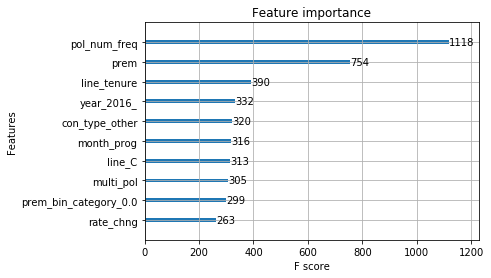

In [55]:
path = 'output/demo'
importances = model_full.feature_importances_
indices = np.argsort(importances)[::-1][:20]
with open(path + '_feat_list.txt', 'w') as file:
    for i in range(0, len(indices)):
        rank = ('{}. Feature: {}  with weight: {}'.format(i + 1, X_train.columns[indices[i]], importances[indices[i]]))
        file.write(rank + '\n')

xgbfir.saveXgbFI(model_full, feature_names=feat_names, OutputXlsxFile=path + '_feat_list.xlsx')

# plot feature importance
plot_importance(model_full, max_num_features=10) # importance_type='gain'
# plt.savefig(path + '_feat_list.jpg')
#     plt.show()

In [56]:
# =============================================================================
# REDUCED MODEL
# =============================================================================

#     model_full = pickle.load(open('../feat_models/' + name + "_full.dat", "rb"))

model_re = SelectFromModel(model_full, threshold='.2*mean', prefit=True)

X_re = model_re.transform(X_train)

df = pd.DataFrame(X_re)
shape = str(df.shape)
with open(path + '_shape.txt', 'w') as file:
    file.write(shape)

feat = df.shape[1]
importances = model_full.feature_importances_
indices = np.argsort(importances)[::-1][:feat]
feat_top = X_train.columns[indices][0:feat]

X_train_rd = X_train[feat_top]

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
feat_names = list(X_test.columns)

X_test_rd = X_test[feat_top]


In [57]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train_rd.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train_rd.columns.values]
feat_names = list(X_train_rd.columns)

model_rd = XGBClassifier(objective = 'binary:logistic', 
                         eval_metric = 'auc', **parameters1, n_jobs=-1)

result = %timeit -o model_rd.fit(X_train_rd, y_train)

print('done')

24min 15s ± 11.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
done


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.1min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

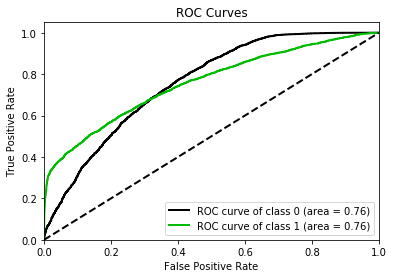

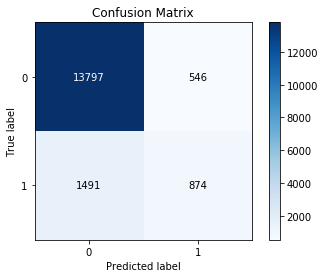

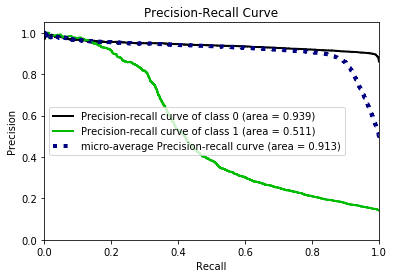

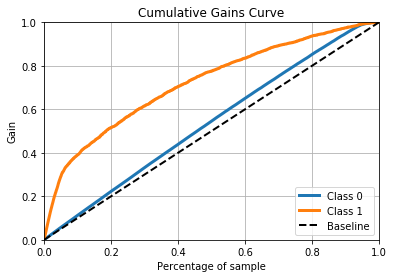

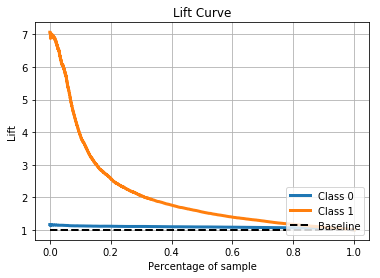

In [58]:
import scikitplot as skplt

# =============================================================================
# ROC CURVES AND TEST
# =============================================================================

y_pred = model_rd.predict(X_test_rd)
y_logloss = model_rd.predict_proba(X_test_rd)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print('log-loss: ', log_loss(y_test, y_logloss))
# print('recall: ', recall_score(y_test, y_pred))
# print('accuracy: ', accuracy_score(y_test, y_pred))
# print('auc: ', roc_auc_score(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_logloss)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = confusion_matrix(y_test, y_pred)

scores = 'auc: ' + str(auc) + ' logloss: ' + str(logloss) + '\n' + ' recall: ' + str(recall) +\
' precision: ' + str(precision) + ' accuracy: ' + str(acc) + ' f1: '+ str(f1) + '\n' +\
str(report[0]) + '\n' + str(report[1]) + '\n' + ' time: ' + str(result) + '\n' +\
                   'reduced model parameters' + '\n' + str(parameters1) + '\n' +\
                    'full model parameters' + '\n' + str(parameters1) 

with open(path + '_scores' + '.txt', 'w') as file:
    file.write(scores)

skplt.metrics.plot_roc(y_test, y_logloss, plot_micro=False, plot_macro=False)                     
plt.savefig(path + '_roc_xgb.jpg')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.savefig(path + '_cm_xgb.jpg')
skplt.metrics.plot_precision_recall(y_test, y_logloss)
plt.savefig(path + '_pr_xgb.jpg')
skplt.metrics.plot_cumulative_gain(y_test, y_logloss)
plt.savefig(path + '_cg_xgb.jpg')
skplt.metrics.plot_lift_curve(y_test, y_logloss)
plt.savefig(path + '_lc_xgb.jpg')
# plt.show

# alert()

 # =============================================================================
# TEST REDUCED MODEL WITH CV
# =============================================================================

rskf_4 = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=184)

# for score in ["accuracy", "precision", "recall", 'roc_auc', 'neg_log_loss', 'f1']:
#     print(score),
#     print(" : "),
#     print(cross_val_score(model_rd, X_test_rd, y_test, cv=rskf_4, scoring=score, n_jobs=-1, verbose=1).mean())
with open(path + '_cv_scores.txt', 'w') as file:
    for metric in ["accuracy", "precision", "recall", 'roc_auc', 'neg_log_loss', 'f1']:
        score = cross_val_score(model_rd, X_test_rd, y_test, cv=rskf_4, scoring=metric, n_jobs=-1, verbose=1).mean()
        metric_score = str(metric) + ': ' + str(score) 
        file.write(metric_score + '\n')

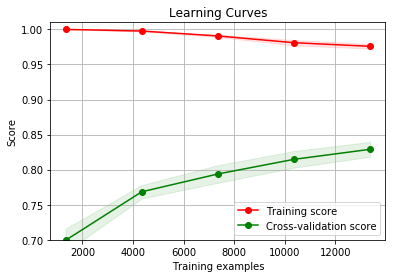

In [59]:
# =============================================================================
# LEARNING/ROC CURVES AND FULL TEST
# =============================================================================

title = "Learning Curves"
plot_learning_curve(model_rd, title, X_test_rd, y_test, ylim=(0.7, 1.01), cv=rskf_4, n_jobs=-1)
plt.savefig(path + '_learning_curve.jpg')
# plt.show()

#     alert()
#     alert()
#     return('all done!')

## SHAP DEMO

In [61]:
import shap
shap.initjs()

In [62]:
explainer = shap.TreeExplainer(model_rd)

shap_values = explainer.shap_values(X_train_rd)

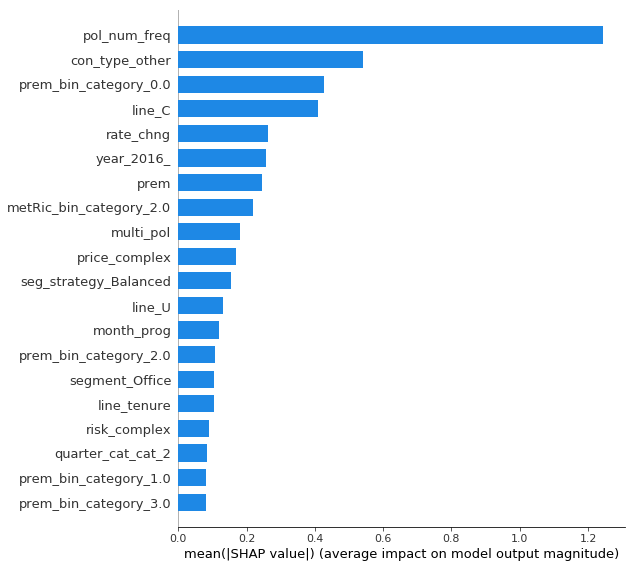

In [63]:
shap.summary_plot(shap_values, X_train_rd, plot_type="bar",show=False)
plt.savefig(path + '_shap.jpg')

In [64]:
# visualize a local prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[6,:], 
                X_train_rd.iloc[6,:])

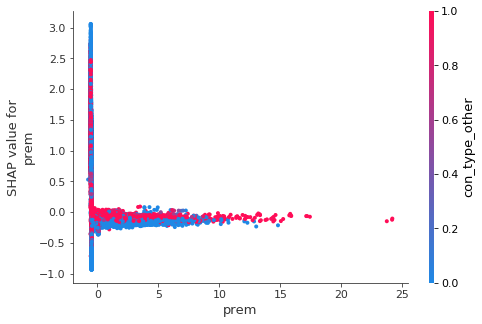

In [65]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("prem", shap_values, X_train_rd)